In [1]:
import cv2

In [10]:
img1 = cv2.imread('../data/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

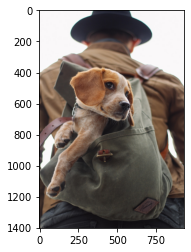

In [12]:
plt.imshow(img1)

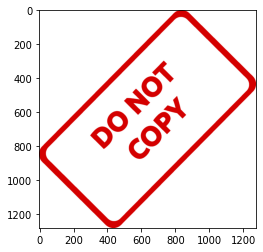

In [14]:
plt.imshow(img2)

In [16]:
img1.shape

(1401, 934, 3)

In [18]:
img2.shape

(1280, 1277, 3)

In [21]:
# BLENDING IMAGES OF THE SAME SIZE
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

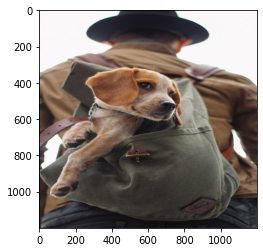

In [22]:
plt.imshow(img1)

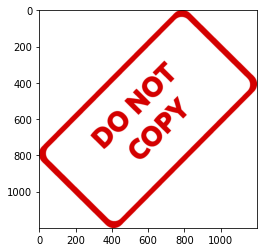

In [23]:
plt.imshow(img2)

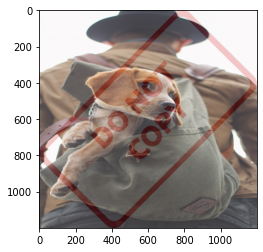

In [27]:
blended = cv2.addWeighted(src1=img1,alpha=0.8,src2=img2,beta=0.2,gamma=0)
plt.imshow(blended)

In [29]:
# OVERLAY SMALL IMAGE ON TOM OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [32]:
img1 = cv2.imread('../data/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

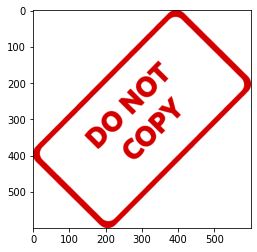

In [35]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img2)

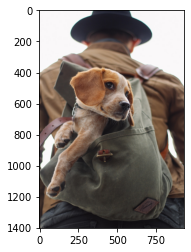

In [36]:
plt.imshow(img1)

In [37]:
large_img = img1
small_img = img2

In [38]:
x_offset = 0
y_offset = 0

In [40]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [42]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

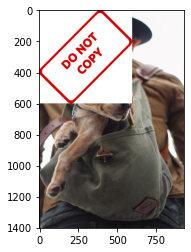

In [45]:
plt.imshow(large_img)

In [46]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES
img1 = cv2.imread('../data/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

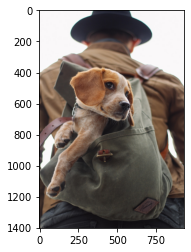

In [47]:
img2 = cv2.resize(img2, (600,600))
plt.imshow(img1)

In [48]:
img1.shape

(1401, 934, 3)

In [49]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [50]:
img2.shape

(600, 600, 3)

In [51]:
rows,cols,channels = img2.shape

In [52]:
rows

600

In [53]:
cols

600

In [81]:
roi = img1[y_offset:1401,x_offset:943]

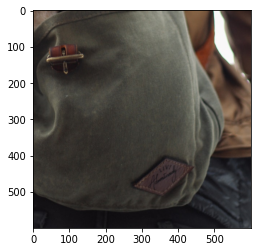

In [55]:
plt.imshow(row)

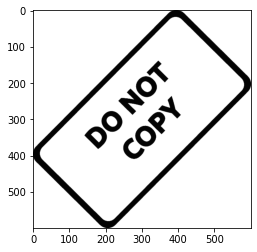

In [58]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray,cmap='gray')

In [59]:
mask_inv = cv2.bitwise_not(img2gray)

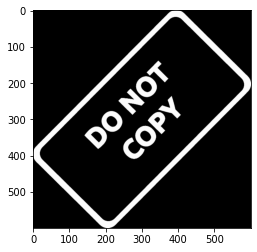

In [63]:
plt.imshow(mask_inv,cmap='gray')

In [64]:
mask_inv.shape

(600, 600)

In [65]:
import numpy as np

In [68]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [69]:
white_background.shape

(600, 600, 3)

In [71]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

In [72]:
bk.shape

(600, 600, 3)

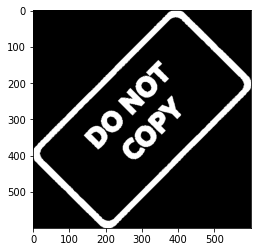

In [73]:
plt.imshow(bk)

In [74]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

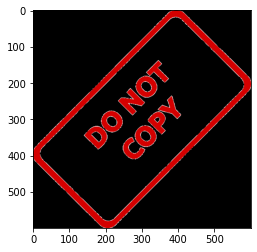

In [75]:
plt.imshow(fg)

In [83]:
final_roi = cv2.bitwise_or(roi,fg)

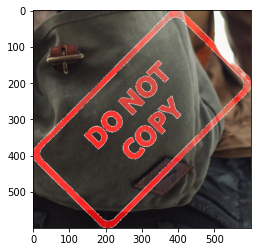

In [84]:
plt.imshow(final_roi)

In [85]:
large_img = img1
small_img = final_roi

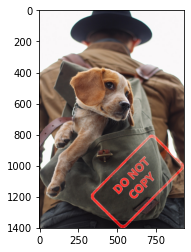

In [86]:
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html